## Team Project with Insurance Dataset

## Import Library

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 100)

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [199]:
df = pd.read_csv("insurance.csv")

In [200]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [202]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


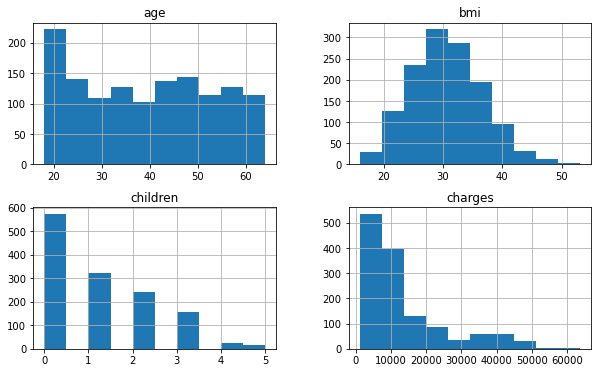

In [203]:
df.hist()
plt.show()

In [204]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [205]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [206]:
df.sort_values(by=['charges']).tail()

,age,sex,bmi,children,smoker,region,charges
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309
543,54,female,47.410,0,yes,southeast,63770.42801


In [207]:
# df=df[df["charges"] <= 35000]  # otlayerleri çıkarınca anormalleşiyor.

In [208]:
df.sort_values(by=['charges']).head()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


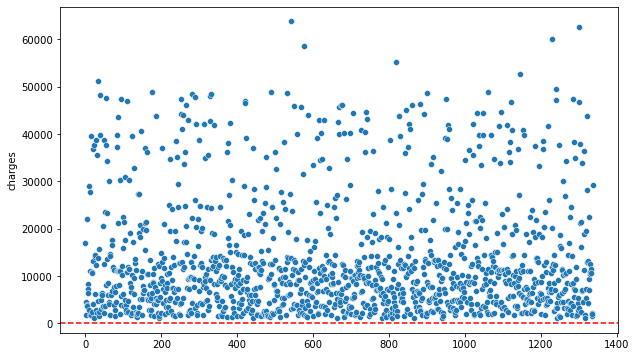

In [209]:
plt.figure(figsize= (10,6))
sns.scatterplot(x =df.index, y = df.charges) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

## EDA
* Use Visualization Tools
* Use Statistical Analysis

In [210]:
women = df.loc[df.sex == 'female']
rate_women = len(women)/len(df.sex)

print(f"% of women who insranced: {rate_women}  total women : {len(women)}")

% of women who insranced: 0.4947683109118087  total women : 662


In [211]:
men = df.loc[df.sex == 'male']
rate_men = len(men)/len(df.sex)
tot=men+women

print(f"% of men who insuranced: {rate_men}  total men : {len(men)}")

% of men who insuranced: 0.5052316890881914  total men : 676


In [212]:
smoker_men=df.loc[df.sex=='male'][df.smoker=='yes']['smoker']
nonsmoker_men=len(men)-len(smoker_men)
smoker_women=df.loc[df.sex=='female'][df.smoker=='yes']['smoker']
nonsmoker_women=len(women)-len(smoker_women)

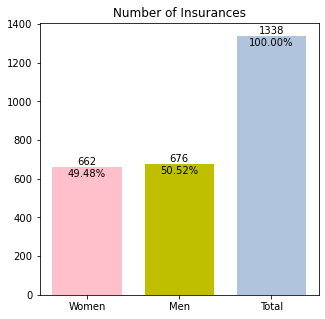

In [213]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (5, 5))
barWidth = 0.75
# set height of bar
y1 = np.array([len(women),len(men),len(tot)])
y2 = np.array([len(women)/len(tot)*100,len(men)/len(tot)*100,len(tot)/len(tot)*100])

# set position of bar on X axis
pos1 = np.arange(3)
pos=[x + barWidth  for x in pos1]
pos=np.array(pos)

# Make the plot
plt.bar(pos, y1, color = ["pink",'y','lightsteelblue'], width = barWidth)

for x, y in zip(pos,y1):
        plt.text(x, y, "%d" % y, ha= "center", va = "bottom")     

for x,y,z in zip(pos,y2,y1):
         plt.text(x, z-10, "%.2f%%" % y, ha= "center", va = "top")     
 
# Add xticks on the middle of group bars
# plt.ylabel("Number of Insurance", fontweight = "bold")
plt.xticks([i  for i in pos], ["Women", "Men", "Total"])
plt.title('Number of Insurances')

# Create legend & show graphic
#plt.legend()
plt.show()

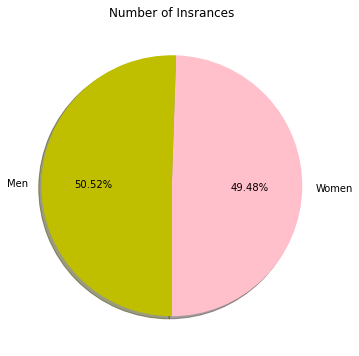

In [214]:
plt.figure(figsize= (6, 6))
labels = ["Women", "Men"]
colors = ["pink","y"] 

ax3=plt.subplot(111)
ax3.pie([len(women),len(men)], labels = labels, colors = colors, startangle = -90, shadow = True, autopct = "%.2f%%")
ax3.set_title('Number of Insrances')

plt.show()

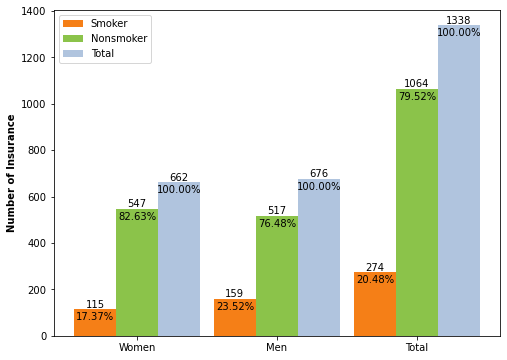

In [215]:
plt.figure(figsize= (8, 6))
barWidth = 0.3
# set height of bar
y1 = np.array([len(smoker_women),len(smoker_men),len(smoker_women)+len(smoker_men)])
y2 = np.array([nonsmoker_women, nonsmoker_men,(nonsmoker_women + nonsmoker_men) ])
y3 = np.array([len(women), len(men), len(tot)])

y11 = np.array([len(smoker_women)/len(women)*100,len(smoker_men)/len(men)*100,(len(smoker_women)+len(smoker_men)) /len(tot)*100])
y12 = np.array([nonsmoker_women/len(women)*100, nonsmoker_men/len(men)*100,(nonsmoker_women + nonsmoker_men) /len(tot)*100])
y13 = np.array([len(women)/len(women)*100, len(men)/len(men)*100, len(tot)/len(tot)*100])

# set position of bar on X axis
pos1 = np.arange(len(y1))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]

# Make the plot
plt.bar(pos1, y1, color = "#F57F17", width = barWidth, label = "Smoker")
plt.bar(pos2, y2, color = "#8BC34A", width = barWidth, label = "Nonsmoker")
plt.bar(pos3, y3, color = "lightsteelblue", width = barWidth, label = "Total")

for x, y in zip(pos1, y1):
    plt.text(x, y, "%d" % y, ha= "center", va = "bottom")     
for x, y in zip(pos2, y2):
    plt.text(x, y, "%d" % y, ha= "center", va = "bottom")  
for x, y in zip(pos3, y3):
    plt.text(x, y, "%d" % y, ha= "center", va = "bottom")  

for x, y,z in zip(pos1, y11,y1):
    plt.text(x, z-10, "%.2f%%" % y, ha= "center", va = "top")     
for x, y,z in zip(pos2, y12,y2):
    plt.text(x, z-10, "%.2f%%" % y, ha= "center", va = "top")  
for x, y,z in zip(pos3, y13,y3):
    plt.text(x, z-10, "%0.2f%%" % y, ha= "center", va = "top")  
    
    # Add xticks on the middle of group bars
plt.ylabel("Number of Insurance", fontweight = "bold")
plt.xticks([i + barWidth for i in range(len(y1))], ["Women", "Men", "Total"])

# Create legend & show graphic
plt.legend()
plt.show()

In [216]:
groped=df.groupby(["children","sex"]).count()      
groped

age  bmi  smoker  region  charges
children sex                                      
0        female  289  289     289     289      289
         male    285  285     285     285      285
1        female  158  158     158     158      158
         male    166  166     166     166      166
2        female  119  119     119     119      119
         male    121  121     121     121      121
3        female   77   77      77      77       77
         male     80   80      80      80       80
4        female   11   11      11      11       11
         male     14   14      14      14       14
5        female    8    8       8       8        8
         male     10   10      10      10       10

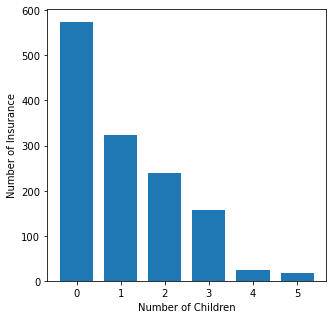

In [217]:
groped=df.groupby(["children"]).count()   
plt.figure(figsize= (5, 5))
barWidth = 0.75
# set height of bar
y = groped["age"]

# set position of bar on X axis
pos1 = np.arange(6)
pos=[x + barWidth  for x in pos1]
pos=np.array(pos)

# Make the plot
plt.bar(pos1, y, width = barWidth)

# Add xticks on the middle of group bars
plt.ylabel("Number of Insurance")
plt.xlabel("Number of Children")

# Create legend & show graphic
#plt.legend()
plt.show()

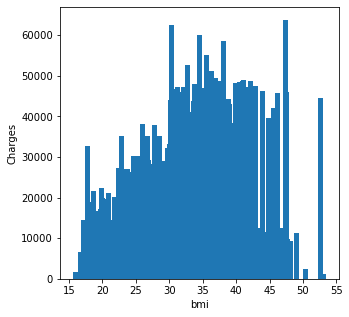

In [218]:
 
plt.figure(figsize= (5, 5))
barWidth = 0.75
# set height of bar
y = df["charges"]

# set position of bar on X axis
pos1 = df["bmi"]
pos=[x + barWidth  for x in pos1]
pos=np.array(pos)

# Make the plot
plt.bar(pos1, y, width = barWidth)

# Add xticks on the middle of group bars
plt.ylabel("Charges")
plt.xlabel("bmi")

# Create legend & show graphic
#plt.legend()
plt.show()

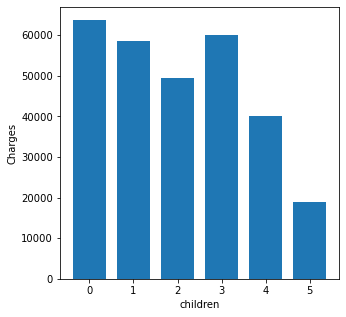

In [219]:
plt.figure(figsize= (5, 5))
barWidth = 0.75
# set height of bar
y = df["charges"]

# set position of bar on X axis
pos1 = df["children"]
pos=[x + barWidth  for x in pos1]
pos=np.array(pos)

# Make the plot
plt.bar(pos1, y, width = barWidth)

# Add xticks on the middle of group bars
plt.ylabel("Charges")
plt.xlabel("children")

# Create legend & show graphic
#plt.legend()
plt.show()

In [220]:
a=pd.DataFrame(df.groupby(['children', 'sex']).count())
b = a.pivot_table(index=['children'], columns=['sex'], values='age') 
b

sex,female,male
children,,
0,289,285
1,158,166
2,119,121
3,77,80
4,11,14
5,8,10


## Data Preparation

In [221]:
df.shape

(1338, 7)

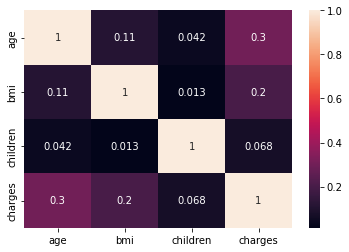

In [222]:
sns.heatmap(df.corr(), annot= True)
plt.show()

In [223]:
from scipy.stats import skew  

In [224]:
for i in df.drop(columns = ["sex","smoker","region"]).columns:   #target vale ile ğraşmayın, bağımsızlarla uğraşın
    print(i, skew(df[i])) 

age 0.055610083072599126
bmi 0.28372857291709386
children 0.9373281163874423
charges 1.5141797118745743


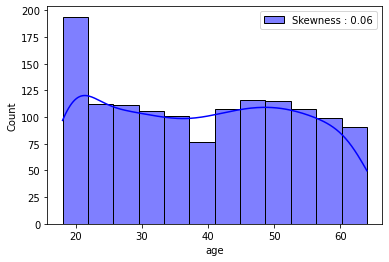

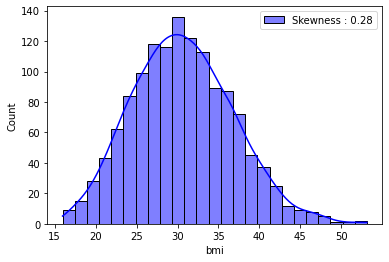

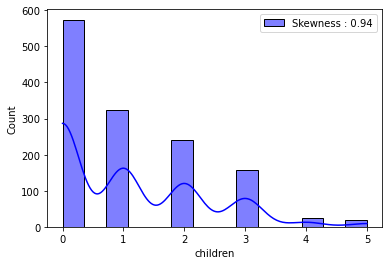

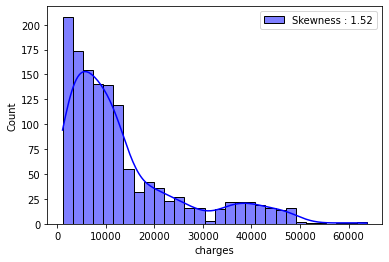

In [225]:
for j in df.drop(columns = ["sex","smoker","region"]).columns:
    g = sns.histplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()),kde=True)
    g = g.legend(loc= "best")   # en iyi yere koy
    plt.show()

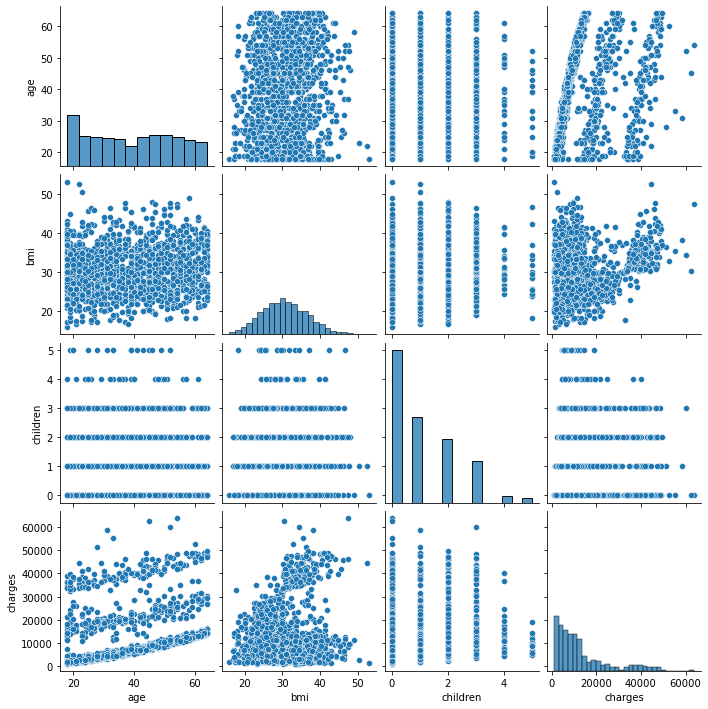

In [226]:
sns.pairplot(df)
plt.show()

## Change string value to numerical
* Sex will change 1 - 0
* Smoker will change 1- 0
* Drop Region Column

In [227]:
df.replace({'female':0,'male':1,'no':0,'yes':1},inplace=True) 
df.drop(columns=["region"],axis=1,inplace=True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


## Train-Test Split

In [229]:
X = df.drop(columns = "charges")
y = df["charges"]
print(X,y)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
# test sayısı % 10 olarak kabul edildi.

In [231]:
print("X Train Features Shape: {}\nY Train Features Shape: {}\nX Test Features Shape: {}\nX Train Features Shape: {}".format(
            X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train Features Shape: (936, 5)
Y Train Features Shape: (936,)
X Test Features Shape: (402, 5)
X Train Features Shape: (402,)


## Model Fitting and Compare Actual and Predicted Labels

In [232]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [233]:
model.fit(X_train, y_train)

LinearRegression()

In [234]:
model.intercept_ 

-12538.439849853112

In [235]:
model.coef_  

array([  261.91061673,   136.65119758,   333.36099462,   432.1792927 ,
       23618.76182167])

In [236]:
y_pred = model.predict(X_test)

In [237]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [238]:
comparing = pd.DataFrame(my_dict)
comparing.head()

,Actual,pred,residual
764,9095.06825,8504.259528,590.808722
887,5272.17580,6897.839411,-1625.663611
890,29330.98315,36805.011783,-7474.028633
1293,9301.89355,9525.016402,-223.122852
259,33750.29180,26834.157836,6916.133964


In [239]:
result_sample = comparing.head(15)
result_sample.head()

,Actual,pred,residual
764,9095.06825,8504.259528,590.808722
887,5272.17580,6897.839411,-1625.663611
890,29330.98315,36805.011783,-7474.028633
1293,9301.89355,9525.016402,-223.122852
259,33750.29180,26834.157836,6916.133964


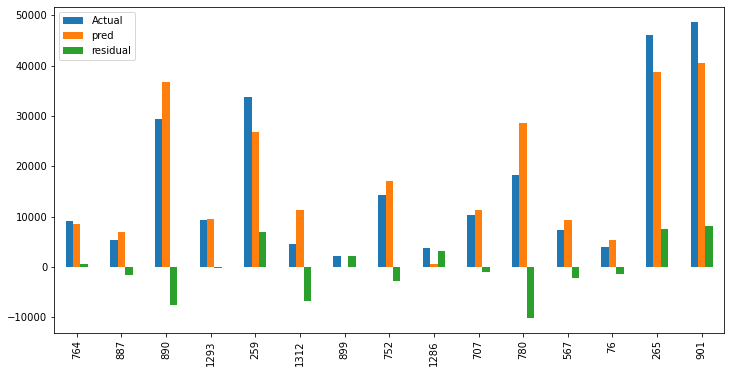

In [240]:
result_sample.plot(kind = "bar", figsize = (12, 6))
plt.show()

## Error Metrics

In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
R2_score = r2_score(y_test, y_pred)
R2_score

0.7680881643600721

In [242]:
mae = mean_absolute_error(y_test, y_pred)
mae

4171.013084093713

In [243]:
mse = mean_squared_error(y_test, y_pred)
mse

34003912.39316076

In [244]:
sales_mean = df["charges"].mean()
sales_mean

13270.422265141257

## Evaluation Model

In [245]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [246]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7680881643600721
MAE 		: 4171.013084093713
MSE 		: 34003912.39316076
RMSE 		: 5831.287370140556


In [247]:
y_train_pred = model.predict(X_train)

In [248]:
eval_metric(y_train, y_train_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.7413880155089707
MAE 		: 4253.809194427619
MSE 		: 37878481.85624296
RMSE 		: 6154.549687527347


In [249]:
# nderfittings var

## Is data suitable for linear regression?

In [250]:
residuals = y_test - y_pred

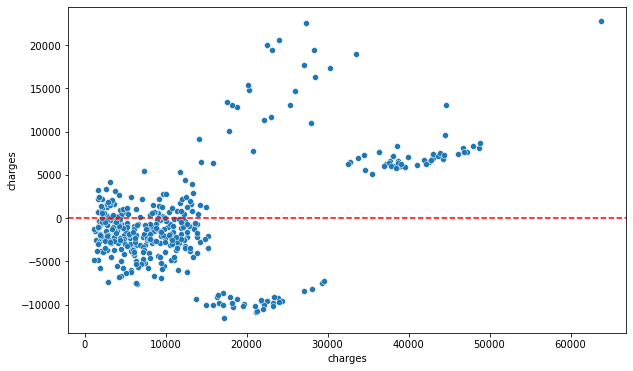

In [251]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

* Residal dağılımı simetrik bir dağılım değil. Lineer regression uygun değil. 

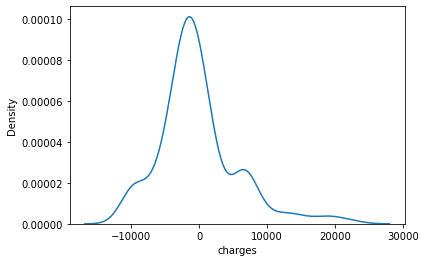

In [252]:
sns.kdeplot(residuals)
plt.show() 

In [253]:
skew(residuals)

1.1318580788301589

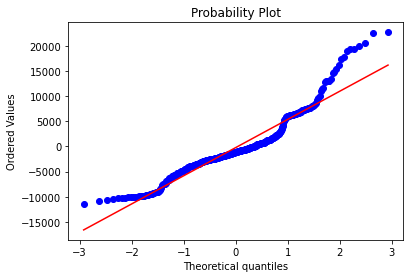

In [254]:
stats.probplot(residuals, dist= "norm", plot= plt);

* Multilinear regression is not suitable.

## Polinomial Conversion Degree = 3

In [255]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree = 3, include_bias= False)
poly_features = polinomial_converter.fit_transform(X)

In [256]:
poly_features.shape

(1338, 55)

In [257]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


## Train | Test Split

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state= 101)

## Scaling the Data

In [260]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, RobustScaler

In [261]:
scaler = StandardScaler()

In [262]:
scaler.fit(X_train)
X_train

array([[23.   ,  1.   , 26.51 , ...,  0.   ,  0.   ,  0.   ],
       [18.   ,  0.   , 38.28 , ...,  0.   ,  0.   ,  0.   ],
       [50.   ,  1.   , 44.77 , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [57.   ,  1.   , 34.01 , ...,  0.   ,  0.   ,  0.   ],
       [52.   ,  0.   , 37.525, ...,  0.   ,  0.   ,  0.   ],
       [36.   ,  0.   , 19.855, ...,  0.   ,  0.   ,  0.   ]])

In [263]:
X_train = scaler.transform(X_train)
X_train

array([[-1.15786012,  0.99626864, -0.68882801, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [-1.51663179, -1.00374533,  1.24518419, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [ 0.77950689,  0.99626864,  2.31160214, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       ...,
       [ 1.28178723,  0.99626864,  0.5435502 , ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [ 0.92301556, -1.00374533,  1.12112479, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [-0.22505378, -1.00374533, -1.78235828, ..., -0.28268476,
        -0.34984074, -0.5174674 ]])

In [264]:
X_test = scaler.transform(X_test)

In [265]:
X_test

array([[-0.08154511,  0.99626864,  1.04307417, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [-1.37312312, -1.00374533, -0.31500662, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [ 1.06652423,  0.99626864, -0.86136096, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       ...,
       [-1.15786012,  0.99626864, -2.1882215 , ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [ 1.35354156, -1.00374533,  0.39402164, ..., -0.28268476,
        -0.34984074, -0.5174674 ],
       [ 1.28178723, -1.00374533, -0.03402439, ..., -0.28268476,
        -0.34984074, -0.5174674 ]])

In [266]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [267]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [269]:
lm.fit(X_train, y_train)

LinearRegression()

In [270]:
y_pred = lm.predict(X_test)

In [271]:
#y_pred

## Evaluate Model

In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [273]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [274]:
y_train_pred = lm.predict(X_train)

In [275]:
#y_train_pred

In [276]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8486177880348178
MAE 		: 2815.603094212928
MSE 		: 22380533.546464074
RMSE 		: 4730.806859983197


In [277]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8445274372637275
MAE 		: 2791.8651088232677
MSE 		: 21938810.023841843
RMSE 		: 4683.888344510557


## Multicolineratiy

In [278]:
def color_red(val):
    if val > 0.9 and val < 0.99:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

# 90 and +90 are muticolineraty

In [279]:
#pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

In [280]:
from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [281]:
from sklearn.model_selection import cross_validate, cross_val_score

In [282]:
model = LinearRegression()

In [283]:
scores = cross_validate(model, X_train, y_train, scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", \
                                                           "neg_root_mean_squared_error"], cv = 10)

In [284]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004996,0.002999,0.806384,-2826.390401,-2.524258e+07,-5024.198986
2,0.003999,0.002999,0.900578,-2657.976653,-1.413990e+07,-3760.305267
3,0.002996,0.001998,0.864173,-2738.156434,-2.022577e+07,-4497.306427
4,0.003000,0.001998,0.785382,-3085.068487,-2.432549e+07,-4932.087628
5,0.003997,0.001999,0.857813,-3054.475392,-2.562912e+07,-5062.520792
6,0.009010,0.002982,0.836057,-2970.603914,-2.553907e+07,-5053.619567
7,0.003998,0.004997,0.798595,-3117.357820,-2.942804e+07,-5424.762200
8,0.003997,0.001998,0.841721,-3088.811972,-2.669276e+07,-5166.503916
9,0.004996,0.002998,0.834975,-3009.017264,-2.479791e+07,-4979.749543
10,0.004997,0.001999,0.756689,-3197.843315,-3.178944e+07,-5638.212757


In [285]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                             8.282367e-01
test_neg_mean_absolute_error       -2.974570e+03
test_neg_mean_squared_error        -2.478101e+07
test_neg_root_mean_squared_error   -4.953927e+03
dtype: float64

In [286]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8445274372637275
MAE 		: 2791.8651088232677
MSE 		: 21938810.023841843
RMSE 		: 4683.888344510557


In [287]:
ps = {"p_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                               "mae" : mean_absolute_error(y_train, y_train_pred),
                               "mse" : mean_squared_error(y_train, y_train_pred),
                               "R2" : r2_score(y_train, y_train_pred)},
               
               "pe_test":  {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "R2" : r2_score(y_test, y_pred)}}

ps = pd.DataFrame(ps)
ps

,p_train,pe_test
rmse,4.730807e+03,4.683888e+03
mae,2.815603e+03,2.791865e+03
mse,2.238053e+07,2.193881e+07
R2,8.486178e-01,8.445274e-01


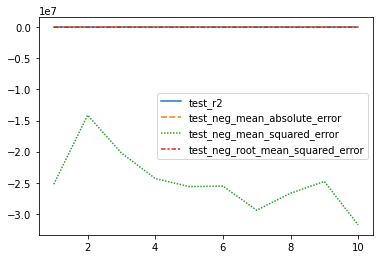

In [288]:
sns.lineplot(data = scores.iloc[:, 2:]);

In [289]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])


## Ridge Regression

In [290]:
from sklearn.linear_model import Ridge

In [291]:
ridge_model = Ridge(alpha = 1)

In [292]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [293]:
y_pred = ridge_model.predict(X_test)
#y_pred

In [294]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8493843285692572
MAE 		: 2778.213274636654
MSE 		: 21253451.69576686
RMSE 		: 4610.146602415899


In [295]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.845371252224312
MAE 		: 2875.510741057064
MSE 		: 22860505.418149587
RMSE 		: 4781.266089452624


In [296]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                               "mae" : mean_absolute_error(y_train, y_train_pred),
                               "mse" : mean_squared_error(y_train, y_train_pred),
                               "R2" : r2_score(y_train, y_train_pred)},
               
               "ridge_test":  {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
                               "mae" : mean_absolute_error(y_test, y_pred),
                               "mse" : mean_squared_error(y_test, y_pred),
                               "R2" : r2_score(y_test, y_pred)}}

rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,4.781266e+03,4.610147e+03
mae,2.875511e+03,2.778213e+03
mse,2.286051e+07,2.125345e+07
R2,8.453713e-01,8.493843e-01


In [297]:
pd.concat([ps, rs], axis = 1)

,p_train,pe_test,ridge_train,ridge_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01


## Choosing best alpha value with Cross-Validation

In [298]:
from sklearn.linear_model import RidgeCV

In [299]:
alpha_space = np.linspace(0.001, 1, 100)
#alpha_space

In [300]:
ridge_cv_model = RidgeCV(alphas= alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [301]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [302]:
ridge_cv_model.alpha_

0.05145454545454546

In [303]:
y_pred = ridge_cv_model.predict(X_test)

In [304]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8463675349645072
MAE 		: 2769.5933966412413
MSE 		: 21679152.929546725
RMSE 		: 4656.087727861957


In [305]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8483421989944132
MAE 		: 2814.6600585066453
MSE 		: 22421276.97122808
RMSE 		: 4735.111083303968


In [306]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,4.735111e+03,4.656088e+03
mae,2.814660e+03,2.769593e+03
mse,2.242128e+07,2.167915e+07
R2,8.483422e-01,8.463675e-01


In [307]:
pd.concat([ps, rs, rcs], axis = 1)

,p_train,pe_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03,4.735111e+03,4.656088e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03,2.814660e+03,2.769593e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07,2.242128e+07,2.167915e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01,8.483422e-01,8.463675e-01


In [308]:
#ridge_cv_model.coef_

## LASSO

* lasso acımasızdır. ancak bizim datalar iyi bir r2 vermese lasso dan başka çıkar yol yyok. 

In [309]:
from sklearn.linear_model import Lasso, LassoCV

In [310]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [311]:
y_train_pred = lasso_model.predict(X_train)

In [312]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8461458374204841
MAE 		: 2861.104219382755
MSE 		: 22745989.784228798
RMSE 		: 4769.275603718955


In [313]:
y_pred = lasso_model.predict(X_test)

In [314]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8481977681195227
MAE 		: 2774.6510345426186
MSE 		: 21420887.826170694
RMSE 		: 4628.270500540207


In [315]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,4.769276e+03,4.628271e+03
mae,2.861104e+03,2.774651e+03
mse,2.274599e+07,2.142089e+07
R2,8.461458e-01,8.481978e-01


In [316]:
pd.concat([ps, rs, rcs, lss], axis = 1)

,p_train,pe_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03,4.735111e+03,4.656088e+03,4.769276e+03,4.628271e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03,2.814660e+03,2.769593e+03,2.861104e+03,2.774651e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07,2.242128e+07,2.167915e+07,2.274599e+07,2.142089e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01,8.483422e-01,8.463675e-01,8.461458e-01,8.481978e-01


## Choosing best alpha value with Cross-Validation

In [317]:
lasso_cv_model = LassoCV(alphas= alpha_space, cv = 10, max_iter = 100000)   #alfayı daha önceden 100 parça olarak aldık.

In [318]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10, max_iter=100000)

In [319]:
lasso_cv_model.alpha_

1.0

In [320]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8480576697035875
MAE 		: 2818.0089209302946
MSE 		: 22463342.133677553
RMSE 		: 4739.5508367014645


In [321]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8469635899054602
MAE 		: 2758.7164146811474
MSE 		: 21595043.322789162
RMSE 		: 4647.046731289579


In [322]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,4.739551e+03,4.647047e+03
mae,2.818009e+03,2.758716e+03
mse,2.246334e+07,2.159504e+07
R2,8.480577e-01,8.469636e-01


In [323]:
pd.concat([ps, rs, rcs, lss, lcs], axis = 1)

,p_train,pe_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03,4.735111e+03,4.656088e+03,4.769276e+03,4.628271e+03,4.739551e+03,4.647047e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03,2.814660e+03,2.769593e+03,2.861104e+03,2.774651e+03,2.818009e+03,2.758716e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07,2.242128e+07,2.167915e+07,2.274599e+07,2.142089e+07,2.246334e+07,2.159504e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01,8.483422e-01,8.463675e-01,8.461458e-01,8.481978e-01,8.480577e-01,8.469636e-01


In [324]:
lasso_cv_model.coef_

array([-0.00000000e+00, -9.25373097e+02, -1.16969395e+04,  5.80179623e+03,
       -9.06748480e+00,  3.78168682e+03,  3.29218363e+03,  0.00000000e+00,
       -1.21355859e+04,  0.00000000e+00, -3.24605034e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.68078819e+04,  7.98618301e+02,
        1.59687262e+04, -0.00000000e+00,  1.46186559e+01, -5.93279533e+03,
       -3.02096960e+02, -6.75527451e+02,  2.45488829e+02,  5.66581838e+03,
       -2.63728892e+03,  7.60540940e+00, -2.55231145e+03,  0.00000000e+00,
        1.05082249e+03, -0.00000000e+00,  1.58476168e+03,  3.02293976e+03,
        2.02546396e+03,  2.44776733e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.16005948e+02, -5.79481041e+02,  9.24333187e+02,
        3.45708629e+02,  4.08284884e+02, -3.11191513e+02, -2.02731895e+02,
       -8.66089354e+02, -1.53191593e+04, -6.14631767e+02, -8.18422448e+03,
       -1.58377218e+03, -6.11294125e+02,  1.53631082e+04, -1.88696541e+02,
        1.05713961e+02,  

In [325]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.00449"])

## Elastic Net
* Lasso ile ridge nin karışımıdır. alfa ve l1_rattio katsayıları vardır.

In [326]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [327]:
elastic_model = ElasticNet()

In [328]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [329]:
elastic_model.l1_ratio    # default değerler

0.5

In [330]:
elastic_model.alpha

1.0

In [331]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8053845955804161
MAE 		: 3544.728529562203
MSE 		: 28772182.218297575
RMSE 		: 5363.970751066562


In [332]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8210722365268691
MAE 		: 3381.5669416722703
MSE 		: 25248584.970498435
RMSE 		: 5024.797007889815


In [333]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}};
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,5.363971e+03,5.024797e+03
mae,3.544729e+03,3.381567e+03
mse,2.877218e+07,2.524858e+07
R2,8.053846e-01,8.210722e-01


In [334]:
pd.concat([ps, rs, rcs, lss, lcs, es], axis = 1)

,p_train,pe_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03,4.735111e+03,4.656088e+03,4.769276e+03,4.628271e+03,4.739551e+03,4.647047e+03,5.363971e+03,5.024797e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03,2.814660e+03,2.769593e+03,2.861104e+03,2.774651e+03,2.818009e+03,2.758716e+03,3.544729e+03,3.381567e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07,2.242128e+07,2.167915e+07,2.274599e+07,2.142089e+07,2.246334e+07,2.159504e+07,2.877218e+07,2.524858e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01,8.483422e-01,8.463675e-01,8.461458e-01,8.481978e-01,8.480577e-01,8.469636e-01,8.053846e-01,8.210722e-01


In [335]:
elastic_model.coef_

array([ 501.78022058,  -78.14253   ,  303.38260237,   58.04275878,
        711.56543196,  574.20369884,   11.18769797,  494.51543336,
         89.9114677 ,  356.08861798,  -78.15629604,  -41.926831  ,
          0.        ,  154.56699879,  148.47931678,  104.40871867,
       1465.25234216,    8.19213143,  -21.10627124,  711.58114994,
        622.80348253,   87.33339105,  534.43187779,  211.92455004,
         99.95730819,   11.18387448,   11.12346232,    9.63645199,
        -48.23647093,  327.84625986,  122.24097369, 1045.33780541,
         46.44876749, -121.12572505,  356.14187416,  -78.13754199,
        -41.8994074 ,    0.        ,  154.62069695,  -67.22542164,
         28.53473954,  626.73166952,  -39.53468053, -153.78848514,
        154.61680372,  -23.63563895,   62.5765626 , 1994.51639474,
          3.45491996,  522.84517041, 1465.285381  ,  -56.02131967,
       -148.12869197,  -21.09503623,  711.57881472])

In [336]:
em_df = pd.DataFrame(elastic_model.coef_, columns= ["elastic_coef_(alp: 1, l1: 0.5)"])

In [337]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1,1.2,1.5], cv = 10, max_iter = 100000)

In [338]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.303727...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1, 1.2, 1.5],
             max_iter=100000)

In [339]:
elastic_cv_model.alpha_   # lasso daha ygn oldğ için lassonun alafasını secti

1.0

* Lasso ile Ridge karşılaştırdı.Lasso daha uygun olduğu için Lasso nun alpha değerini seçti
* Zaten elastic net Ridge ve Lasso nun birleşimidir ama Lasso ya daha yatkındır.

In [340]:
elastic_cv_model.l1_ratio_

1.0

In [341]:
elastic_cv_model.coef_

array([-0.00000000e+00, -9.25373097e+02, -1.16969395e+04,  5.80179623e+03,
       -9.06748480e+00,  3.78168682e+03,  3.29218363e+03,  0.00000000e+00,
       -1.21355859e+04,  0.00000000e+00, -3.24605034e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.68078819e+04,  7.98618301e+02,
        1.59687262e+04, -0.00000000e+00,  1.46186559e+01, -5.93279533e+03,
       -3.02096960e+02, -6.75527451e+02,  2.45488829e+02,  5.66581838e+03,
       -2.63728892e+03,  7.60540940e+00, -2.55231145e+03,  0.00000000e+00,
        1.05082249e+03, -0.00000000e+00,  1.58476168e+03,  3.02293976e+03,
        2.02546396e+03,  2.44776733e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.16005948e+02, -5.79481041e+02,  9.24333187e+02,
        3.45708629e+02,  4.08284884e+02, -3.11191513e+02, -2.02731895e+02,
       -8.66089354e+02, -1.53191593e+04, -6.14631767e+02, -8.18422448e+03,
       -1.58377218e+03, -6.11294125e+02,  1.53631082e+04, -1.88696541e+02,
        1.05713961e+02,  

In [342]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns= ["elastic_coef_(alp: 0.01, l1: 1)"])

In [343]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8480576697035875
MAE 		: 2818.0089209302946
MSE 		: 22463342.133677553
RMSE 		: 4739.5508367014645


In [344]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8469635899054602
MAE 		: 2758.7164146811474
MSE 		: 21595043.322789162
RMSE 		: 4647.046731289579


In [345]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,4.739551e+03,4.647047e+03
mae,2.818009e+03,2.758716e+03
mse,2.246334e+07,2.159504e+07
R2,8.480577e-01,8.469636e-01


In [358]:
pd.concat([ps, rs, rcs, lss, lcs, es, ecs], axis = 1)

,p_train,pe_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,4.730807e+03,4.683888e+03,4.781266e+03,4.610147e+03,4.735111e+03,4.656088e+03,4.769276e+03,4.628271e+03,4.739551e+03,4.647047e+03,5.363971e+03,5.024797e+03,4.739551e+03,4.647047e+03
mae,2.815603e+03,2.791865e+03,2.875511e+03,2.778213e+03,2.814660e+03,2.769593e+03,2.861104e+03,2.774651e+03,2.818009e+03,2.758716e+03,3.544729e+03,3.381567e+03,2.818009e+03,2.758716e+03
mse,2.238053e+07,2.193881e+07,2.286051e+07,2.125345e+07,2.242128e+07,2.167915e+07,2.274599e+07,2.142089e+07,2.246334e+07,2.159504e+07,2.877218e+07,2.524858e+07,2.246334e+07,2.159504e+07
R2,8.486178e-01,8.445274e-01,8.453713e-01,8.493843e-01,8.483422e-01,8.463675e-01,8.461458e-01,8.481978e-01,8.480577e-01,8.469636e-01,8.053846e-01,8.210722e-01,8.480577e-01,8.469636e-01


* tüm modelleremizden yapmış olduğumuz karşılaştırmalar sonucunda test skoru olarak lasso alpha 0.004 değeri. Train skoru en yüksek olan ridge 0.018 değeri. Test değeri daha önemli olduğundan en başarılı model lasso alpha = 0.004 olan modeldir.

## Grid Search

In [347]:
from sklearn.model_selection import GridSearchCV

In [348]:
elastic_model = ElasticNet(max_iter = 10000)

In [349]:
param_grid = {"alpha": [0.5, 2, 2.5, 3, 3.5,4,4.5,5,5.5,6,6.5,8],
             "l1_ratio": [0.7, 0.9, 0.95, 0.99, 1,1.2,1.3,1.5,2,3,5]}

In [350]:
grid_model = GridSearchCV(estimator= elastic_model, param_grid= param_grid, scoring = "neg_root_mean_squared_error", cv = 10, verbose = 2)

In [351]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 132 candidates, totalling 1320 fits
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5,
                                   8],
                         'l1_ratio': [0.7, 0.9, 0.95, 0.99, 1, 1.2, 1.3, 1.5, 2,
                                      3, 5]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [352]:
grid_model.best_params_

{'alpha': 8, 'l1_ratio': 1}

In [353]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056256,0.011248,0.000699,0.000458,0.5,0.7,"{'alpha': 0.5, 'l1_ratio': 0.7}",-5044.383010,-3606.640528,-4768.802344,-4992.405429,-5335.656817,-5348.775113,-5728.167345,-5368.051319,-5127.670128,-5679.223979,-5099.977601,572.242886,29
1,0.097785,0.012353,0.000600,0.000490,0.5,0.9,"{'alpha': 0.5, 'l1_ratio': 0.9}",-5009.170011,-3535.877153,-4586.790162,-4836.845707,-5241.084063,-5253.718857,-5630.782047,-5201.520072,-5001.878307,-5526.171209,-4982.383759,563.546711,22
2,0.166468,0.040919,0.000700,0.000458,0.5,0.95,"{'alpha': 0.5, 'l1_ratio': 0.95}",-5022.105916,-3539.332341,-4548.037638,-4812.130921,-5224.430502,-5222.859805,-5605.849436,-5167.486381,-4978.804954,-5486.625186,-4960.766308,555.932073,15
3,0.656772,0.125413,0.000400,0.000490,0.5,0.99,"{'alpha': 0.5, 'l1_ratio': 0.99}",-5049.782774,-3591.983116,-4518.830722,-4844.797698,-5208.034598,-5170.038286,-5588.592566,-5176.593275,-4978.267149,-5478.802358,-4960.572254,538.943211,14
4,0.774499,0.088946,0.000200,0.000400,0.5,1,"{'alpha': 0.5, 'l1_ratio': 1}",-5005.910769,-3738.997001,-4470.868673,-4887.225818,-5074.383766,-5040.982582,-5442.028460,-5171.034647,-4948.213532,-5634.597795,-4941.424304,498.578086,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.000999,0.000001,0.000000,0.000000,8,1.3,"{'alpha': 8, 'l1_ratio': 1.3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
128,0.000799,0.000400,0.000000,0.000000,8,1.5,"{'alpha': 8, 'l1_ratio': 1.5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
129,0.000600,0.000490,0.000000,0.000000,8,2,"{'alpha': 8, 'l1_ratio': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
130,0.000899,0.000300,0.000000,0.000000,8,3,"{'alpha': 8, 'l1_ratio': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118


## Using Best Model From GridSearch

In [354]:
y_pred = grid_model.predict(X_test)

In [355]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8511760310335974
MAE 		: 2774.4538376239716
MSE 		: 21000623.67715957
RMSE 		: 4582.643743207579


In [356]:
y_train_pred = grid_model.predict(X_train)

In [357]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8433246128841745
MAE 		: 2903.036763344775
MSE 		: 23163083.110831186
RMSE 		: 4812.804079830301
